## 1. Penjelasan

### Dataset "Dataset Heart Failure"

Dataset ini berisi informasi data kesehatan pasien yang berpotensi terkena penyakit jantung. dengan kolom-kolom sebagai berikut:

1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

### Tujuan Prediksi
Dengan dataset ini, kita dapat membuat model untuk memprediksi apakah pasien yang akan diprediksi selamat atau tidak dari penyakit jantung.


## 2. Import Library

1. **Import Library:**
   - `numpy` dan `pandas` untuk manipulasi data.
   - `warnings` untuk menyembunyikan warning.
   - `seaborn` dan `matplotlib.pyplot` untuk visualisasi data.

2. **Set Option:**
   - `pd.set_option("display.max.columns", None)`: Mengatur opsi pandas agar semua kolom dapat ditampilkan.

3. **Import Model untuk Klasifikasi:**
   - `RandomForestClassifier`  dari sklearnlearn untuk digunakan pada masalah klasifikasi.

4. **Split Dataset dan Standarisasi:**
   - `Winsorizer` dari Feature-Engine untuk mengatasi outlier.
   - `LabelEncoder` untuk mengkodekan variabel kategorikal.
   - `RobustScaler` untuk standarisasi data yang tahan terhadap outlier.
   - `train_test_split` dari scikit-learn untuk membagi dataset menjadi training dan testing sets.

5. **Evaluasi Model:**
   - `accuracy_score`, `classification_report`, dan `confusion_matrix` dari scikit-learn untuk mengevaluasi performa model klasifikasi.


In [274]:
import numpy as np
import pandas as pd 
import pickle
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

warnings.filterwarnings("ignore")

pd.set_option("display.max.columns", None)

# For Classification Problems
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Split Dataset and Standarize the Datasets
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split


# Evaluate  Models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 3. Data Loading

1. Data Loading:
   - The code snippet is responsible for loading a dataset from a CSV file.
   - `pd.read_csv('heart_failure_clinical_records_dataset.csv')` reads the CSV file located in the '../Dataset' directory and stores it as a DataFrame named 'df'. This is done using the pandas library.

2. Dataset Shape:
   - `df.shape` is used to retrieve and display the dimensions of the dataset. It returns a tuple of (number of rows, number of columns) in the DataFrame 'df'.

3. Dataset Information:
   - `df.info()` is employed to obtain a summary of the dataset's information, including the data types of each column, the number of non-null entries, and memory usage. This provides an overview of the dataset's structure.

4. Descriptive Statistics:
   - `df.describe()` generates basic descriptive statistics for the numerical columns in the dataset. It includes count, mean, standard deviation, minimum, quartiles, and maximum values for each numeric column. This helps in understanding the distribution and characteristics of the data.

This code is the initial step in the data analysis process, where the dataset is loaded, and basic information about its shape, data types, and summary statistics is displayed. Further analysis and data processing can be performed based on this initial exploration.


In [275]:
df = pd.read_csv('../../Dataset/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [276]:
df.shape

(299, 13)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Note
- Pada kolom "age" harusnya bertipe data integer

In [278]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## 4. Data Cleaning

In [279]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [280]:
#Mencari angka float pada kolom "age"
df['age'].unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

In [281]:
#Membuat bilangan desimal yang ada pada kolom "age" menjadi bilangan bulat, sekaligus mengubah tipe data nya menjadi integer 
df['age'] = df['age'].round()
df['age'] = df['age'].astype(int)
df['age'].dtype

dtype('int32')

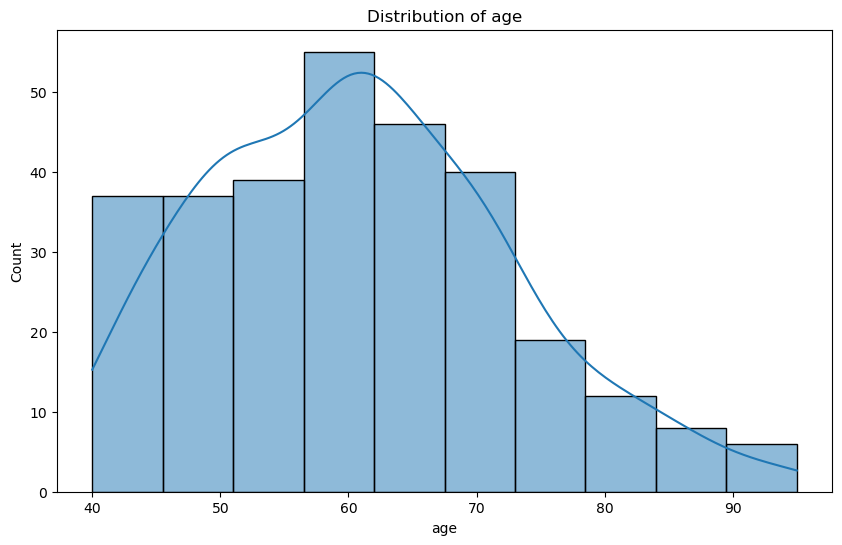

Skewness of age: 0.42249641023531076


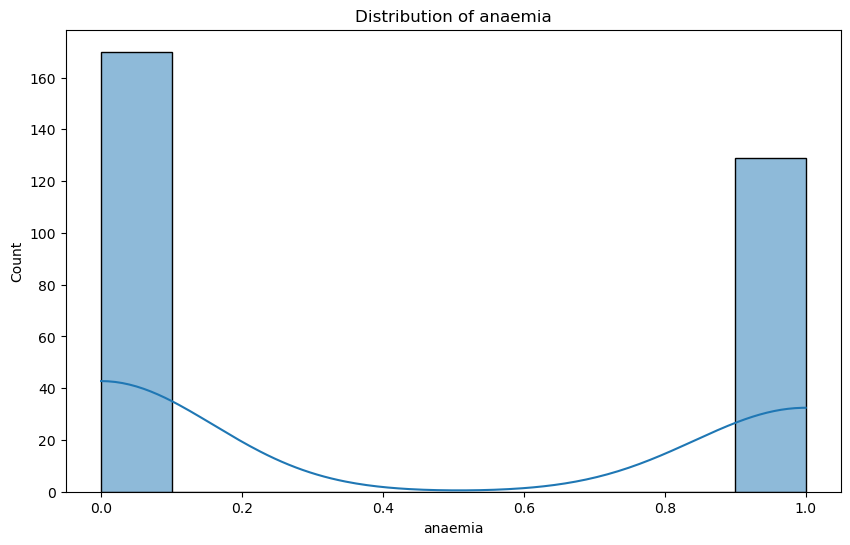

Skewness of anaemia: 0.2782606644055605


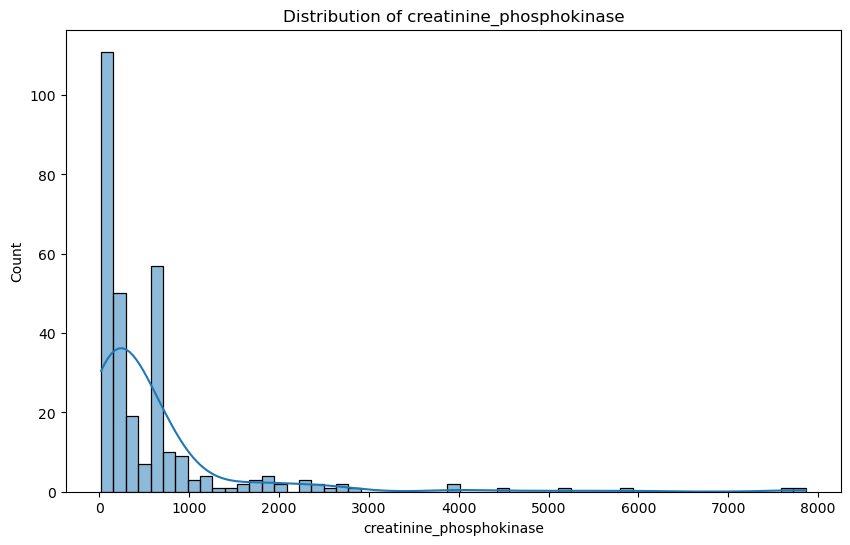

Skewness of creatinine_phosphokinase: 4.463110084653752


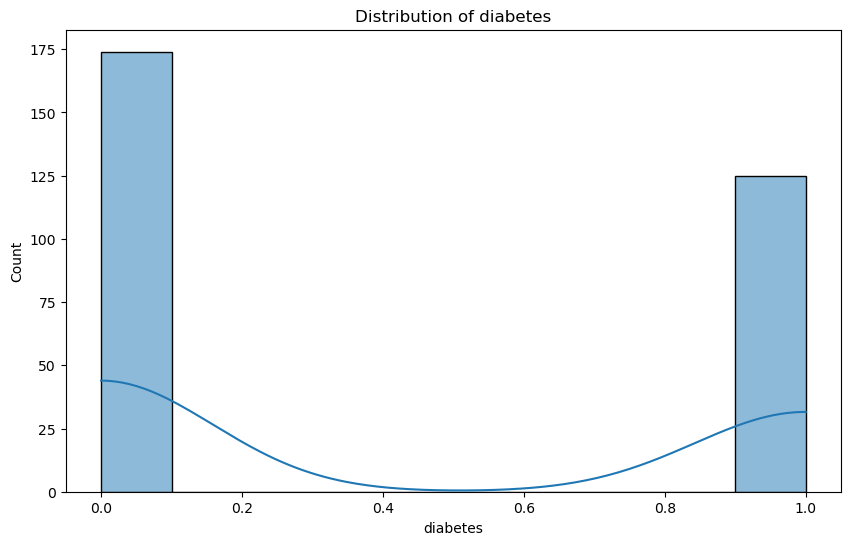

Skewness of diabetes: 0.3339286842537603


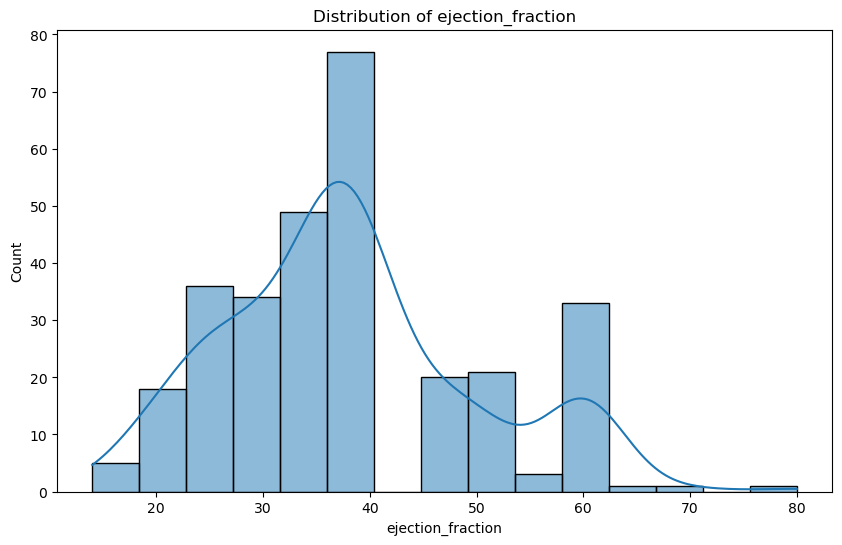

Skewness of ejection_fraction: 0.5553827516973211


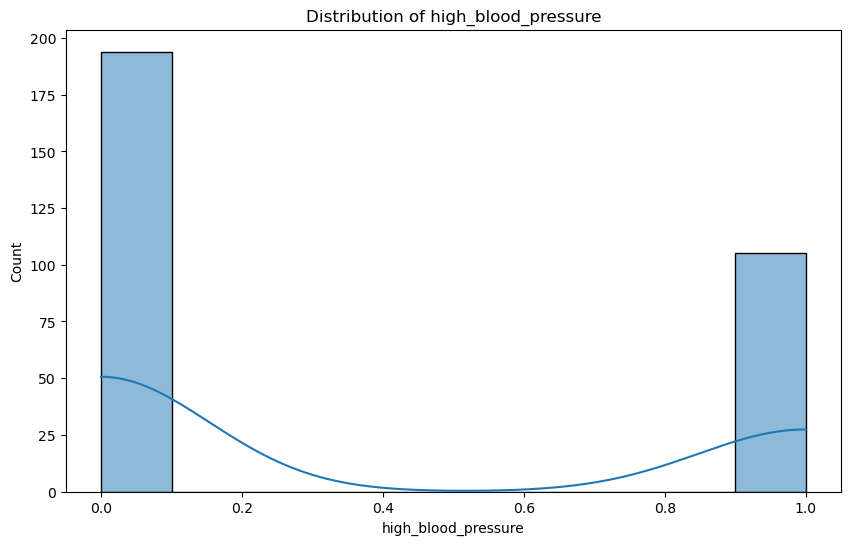

Skewness of high_blood_pressure: 0.6267318547287857


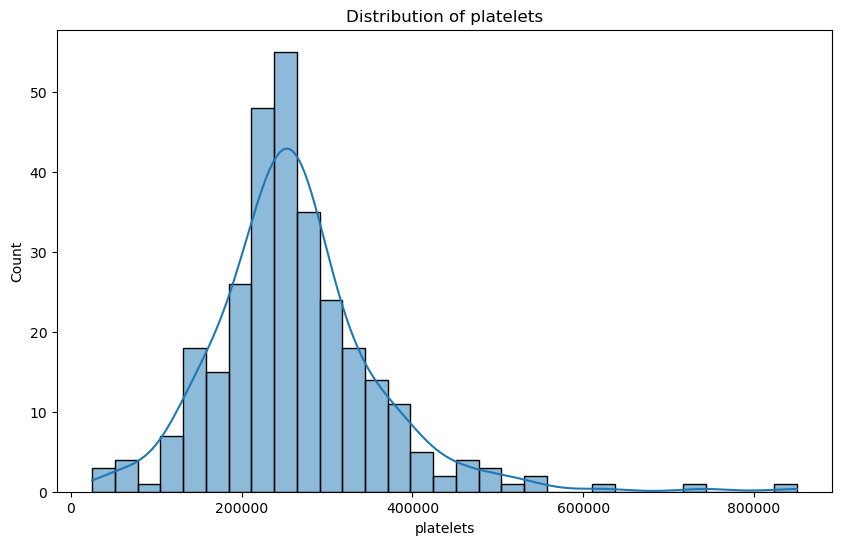

Skewness of platelets: 1.4623208382757793


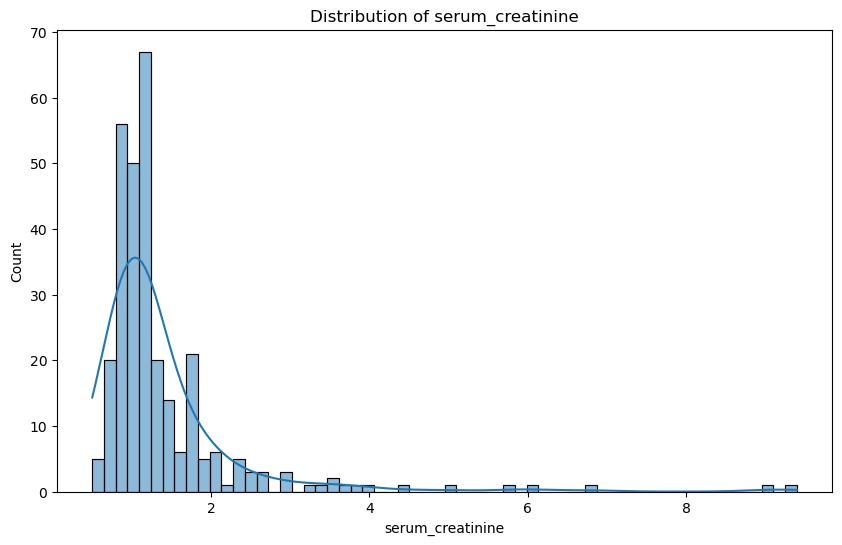

Skewness of serum_creatinine: 4.455995882049026


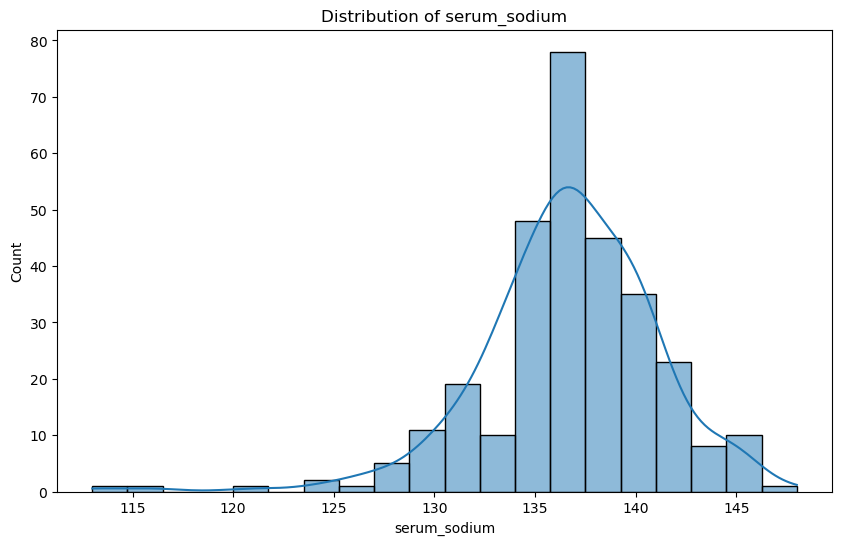

Skewness of serum_sodium: -1.0481360160574988


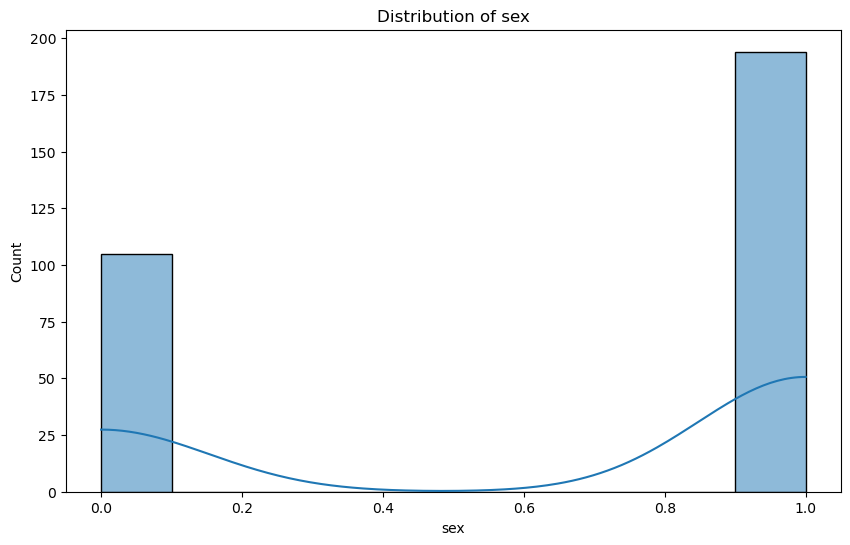

Skewness of sex: -0.6267318547287857


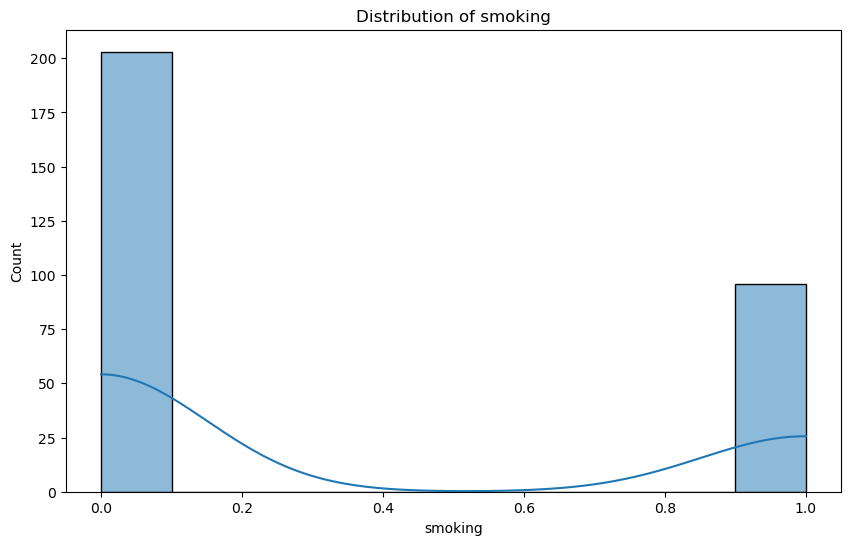

Skewness of smoking: 0.770348815438949


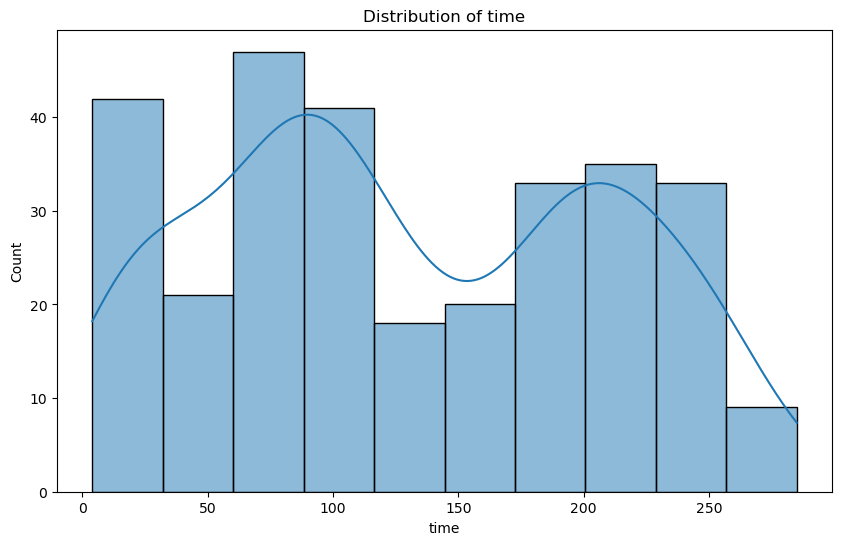

Skewness of time: 0.12780264559841184


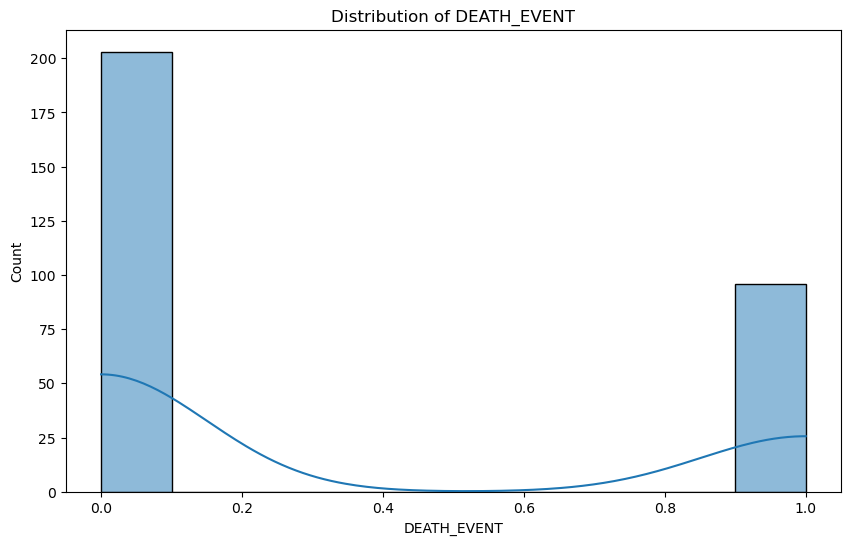

Skewness of DEATH_EVENT: 0.7703488154389491


In [282]:
# Menghitung skewness dan membuat diagram distribusi
for col in df:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')

    plt.show()

    skewness = df[col].skew()
    print(f'Skewness of {col}: {skewness}')

In [283]:
#List kolom yang punya tingkat skewness diatas 1 dan dibawah -1
skewed_cols = df.columns[(df.skew() > 1) | (df.skew() < -1)].tolist()
skewed_cols

['creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium']

##### NOTE:
Kolom yang memiliki distribusi Normal : age, anaemia, diabetes, ejection_fraction, high_blood_pressure, sex, smoking, dan time.

Kolom yang memiliki distribusi skewed : creatinine_phosphokinase, platelets, serum_creatinine, dan serum_sodium.

In [284]:
# Handling data skewed
# Loop buat handle outliers dan ganti dengan median
for col in skewed_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Ganti outliers dengan median
    median_value = df[col].median()
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_value

In [285]:
# Menghitung skewness untuk kolom yang sebelumnya memiliki data skewness yang melebihi 1 dan kurang dari -1
fix_skew_column = ['creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium']

# Hitung skewness
skewness_result = df[fix_skew_column].apply(lambda x: x.skew()).reset_index()
skewness_result.columns = ['Feature', 'Skewness']

# Tampilkan hasil
print(skewness_result)

                    Feature  Skewness
0  creatinine_phosphokinase  1.157500
1                 platelets  0.172135
2          serum_creatinine  1.041033
3              serum_sodium -0.127243


In [286]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.836120,0.431438,324.290970,0.418060,38.083612,0.351171,255183.781773,1.132676,136.872910,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,264.941729,0.494067,11.834841,0.478136,65566.768001,0.321682,3.841303,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,87000.000000,0.500000,125.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,218000.000000,0.900000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,287500.000000,1.200000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,1211.000000,1.000000,80.000000,1.000000,427000.000000,2.100000,148.000000,1.000000,1.00000,285.000000,1.00000


In [287]:
df['DEATH_EVENT'].unique().tolist()

[1, 0]

## 4. Explorasi Data

In [288]:
df.columns.values

array(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'], dtype=object)

In [289]:
# Hitung korelasi
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['DEATH_EVENT'].sort_values(ascending=False)

# Tampilkan hasil korelasi
print(correlation_with_target)

DEATH_EVENT                 1.000000
serum_creatinine            0.327965
age                         0.253800
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase   -0.000567
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.029007
serum_sodium               -0.175212
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64


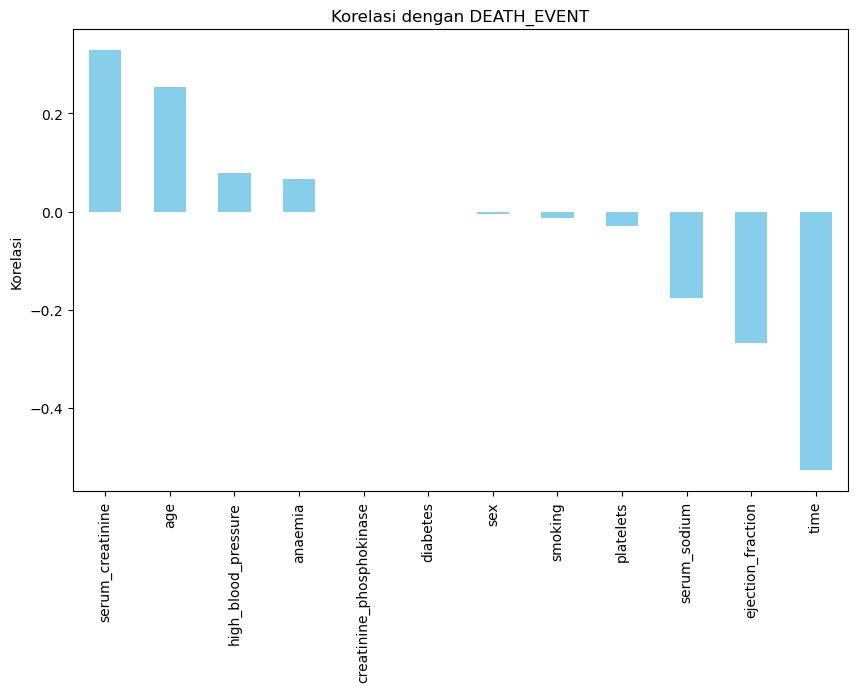

In [290]:
# Koreasi dengan target variabel
# Plot bar plot
plt.figure(figsize=(10, 6))
correlation_with_target.drop('DEATH_EVENT').plot(kind='bar', color='skyblue')
plt.title("Korelasi dengan DEATH_EVENT")
plt.ylabel("Korelasi")
plt.show()

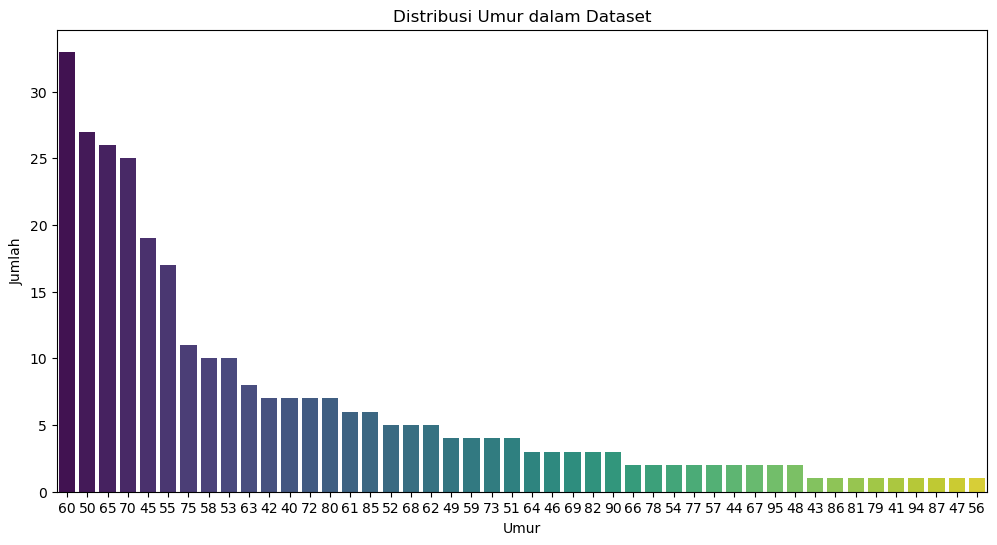

In [291]:
# Plot count plot untuk distribusi umur
plt.figure(figsize=(12, 6))
sns.countplot(x='age', data=df, palette='viridis', order=df['age'].value_counts().index)
plt.title("Distribusi Umur dalam Dataset")
plt.xlabel("Umur")
plt.ylabel("Jumlah")
plt.show()

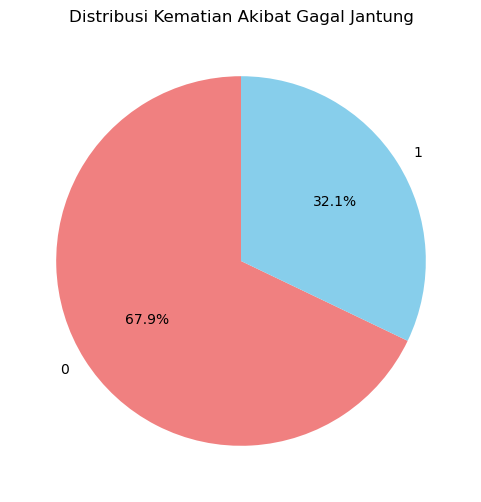

In [292]:
# Hitung jumlah pasien yang meninggal dan yang tidak meninggal
count_death = df['DEATH_EVENT'].value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(count_death, labels=count_death.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Distribusi Kematian Akibat Gagal Jantung')
plt.show()

In [293]:
# Make a diagnostic_plots function
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [294]:
df.columns.tolist()

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

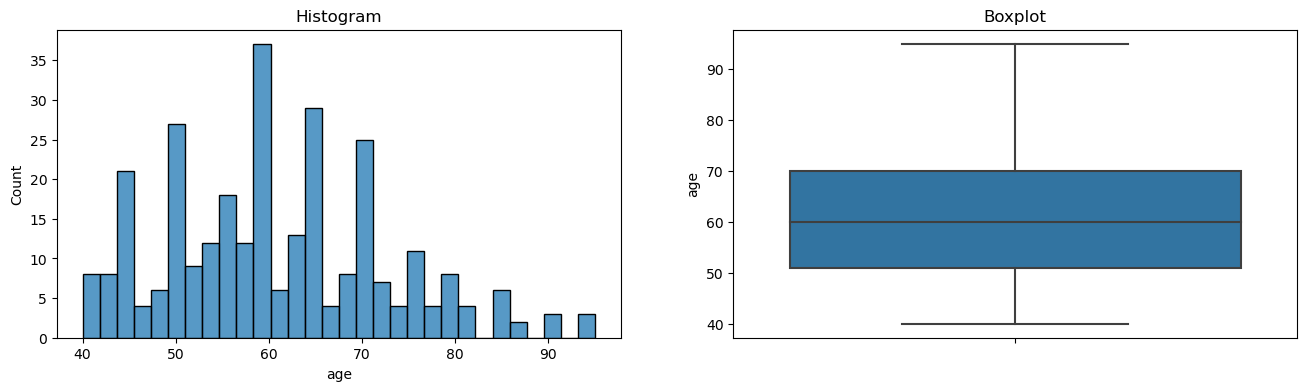


Skewness Value :  0.42249641023531076


In [295]:
# Call the function to generate diagnostic plots for 'age'
diagnostic_plots(df, 'age')
print('\nSkewness Value : ', df['age'].skew())

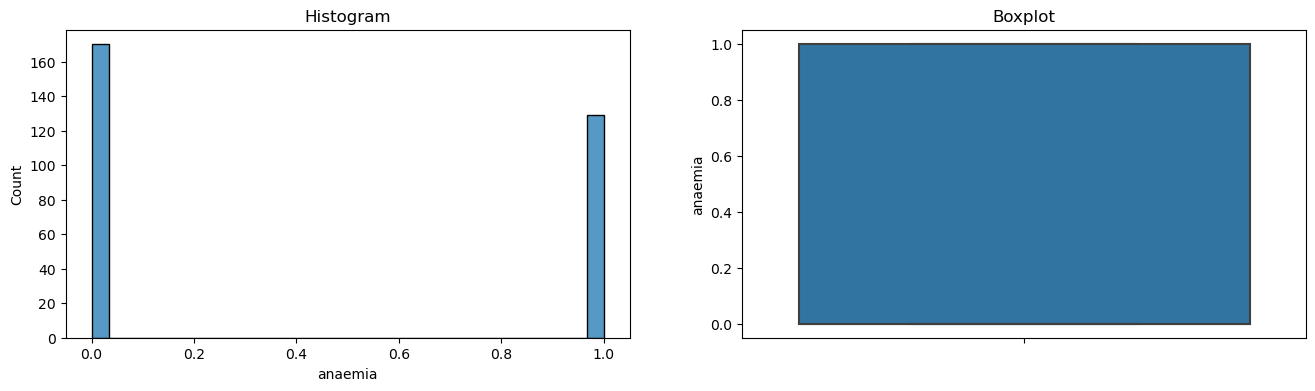


Skewness Value :  0.2782606644055605


In [296]:
# Call the function to generate diagnostic plots for 'anaemia'
diagnostic_plots(df, 'anaemia')
print('\nSkewness Value : ', df['anaemia'].skew())

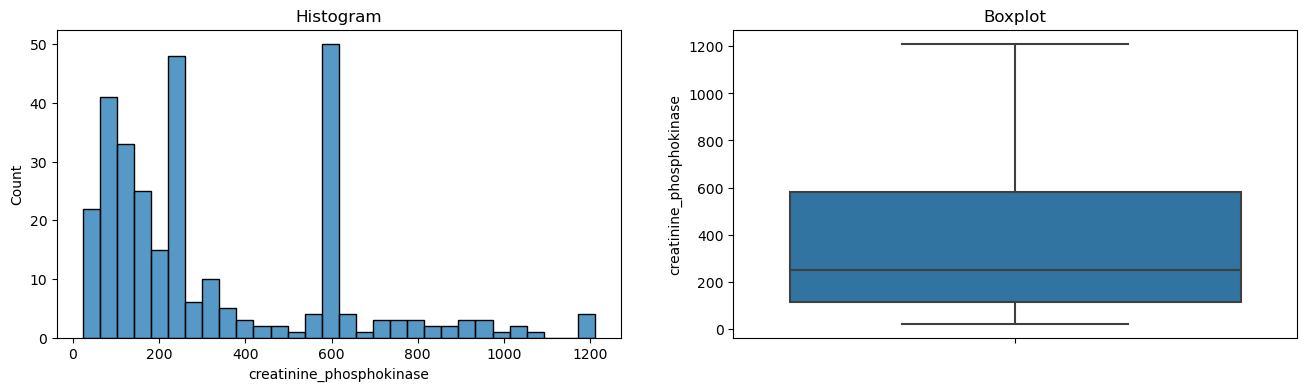


Skewness Value :  1.1575000163630902


In [297]:
# Call the function to generate diagnostic plots for 'creatinine_phosphokinase'
diagnostic_plots(df, 'creatinine_phosphokinase')
print('\nSkewness Value : ', df['creatinine_phosphokinase'].skew())

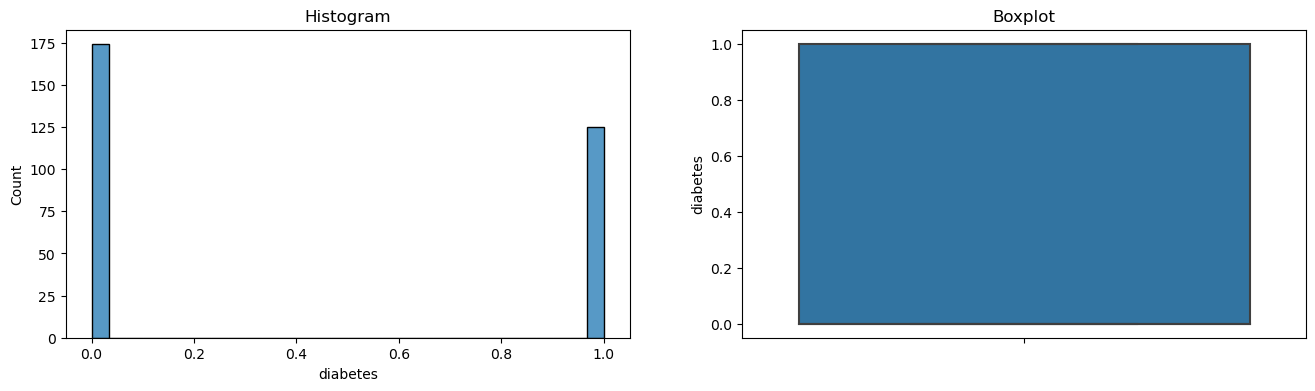


Skewness Value :  0.3339286842537603


In [298]:
# Call the function to generate diagnostic plots for 'diabetes'
diagnostic_plots(df, 'diabetes')
print('\nSkewness Value : ', df['diabetes'].skew())

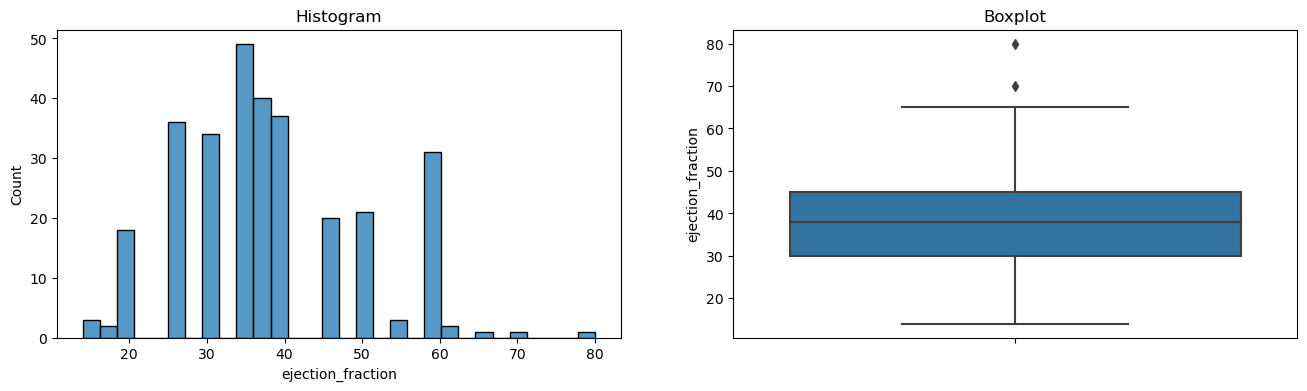


Skewness Value :  0.5553827516973211


In [299]:
# Call the function to generate diagnostic plots for 'ejection_fraction'
diagnostic_plots(df, 'ejection_fraction')
print('\nSkewness Value : ', df['ejection_fraction'].skew())

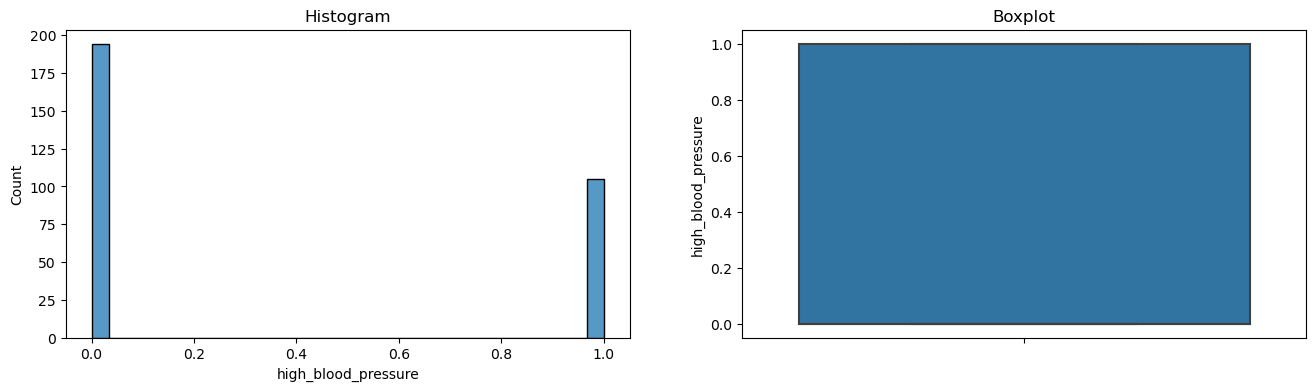


Skewness Value :  0.6267318547287857


In [300]:
# Call the function to generate diagnostic plots for 'high_blood_pressure'
diagnostic_plots(df, 'high_blood_pressure')
print('\nSkewness Value : ', df['high_blood_pressure'].skew())

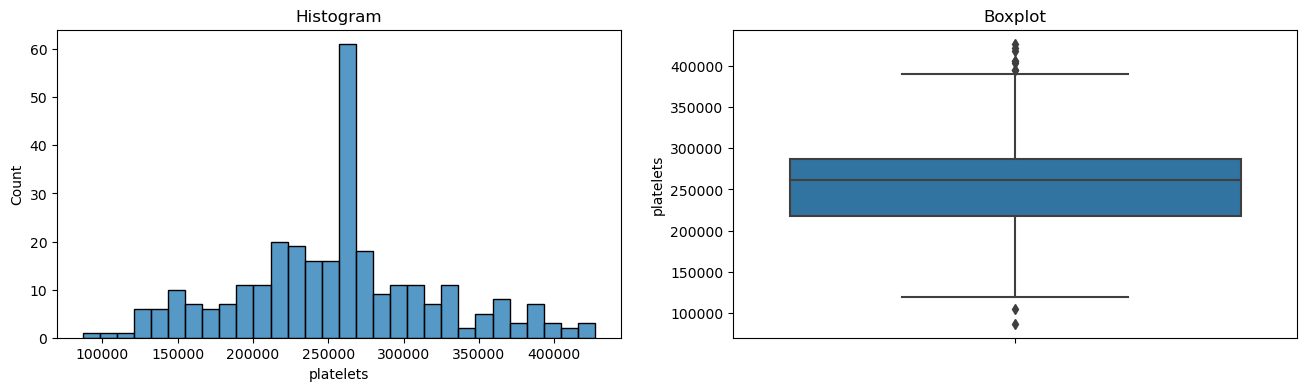


Skewness Value :  0.17213458846990382


In [301]:
# Call the function to generate diagnostic plots for 'platelets'
diagnostic_plots(df, 'platelets')
print('\nSkewness Value : ', df['platelets'].skew())

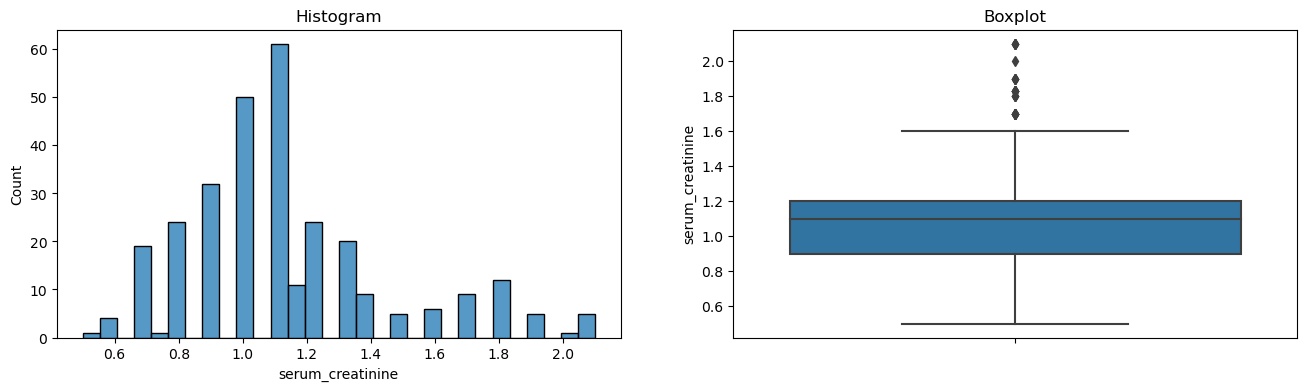


Skewness Value :  1.0410328811556238


In [302]:
# Call the function to generate diagnostic plots for 'serum_creatinine'
diagnostic_plots(df, 'serum_creatinine')
print('\nSkewness Value : ', df['serum_creatinine'].skew())

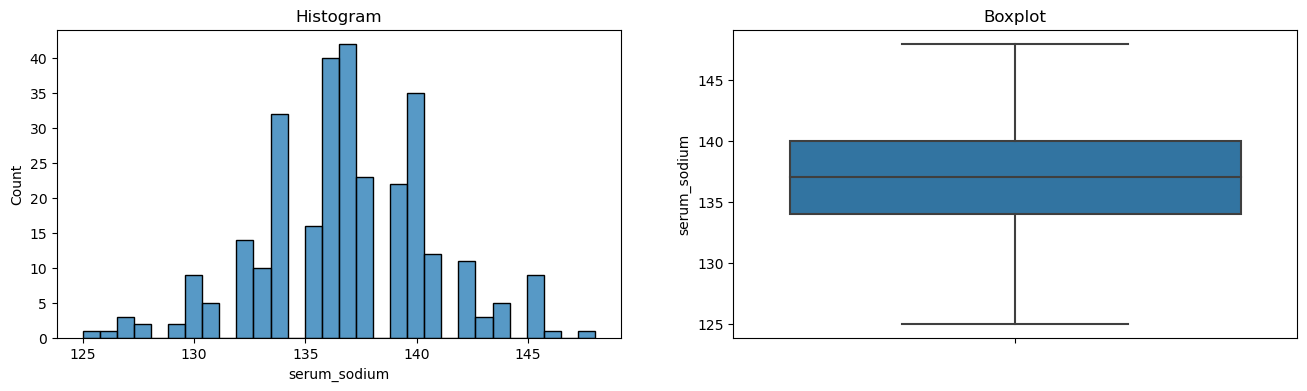


Skewness Value :  -0.12724330875432469


In [303]:
# Call the function to generate diagnostic plots for 'serum_sodium'
diagnostic_plots(df, 'serum_sodium')
print('\nSkewness Value : ', df['serum_sodium'].skew())

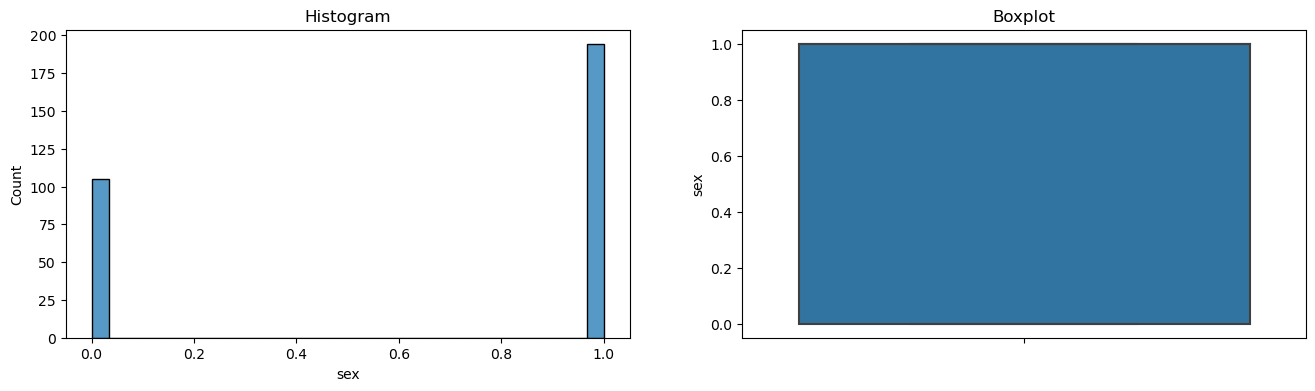


Skewness Value :  -0.6267318547287857


In [304]:
# Call the function to generate diagnostic plots for 'sex'
diagnostic_plots(df, 'sex')
print('\nSkewness Value : ', df['sex'].skew())

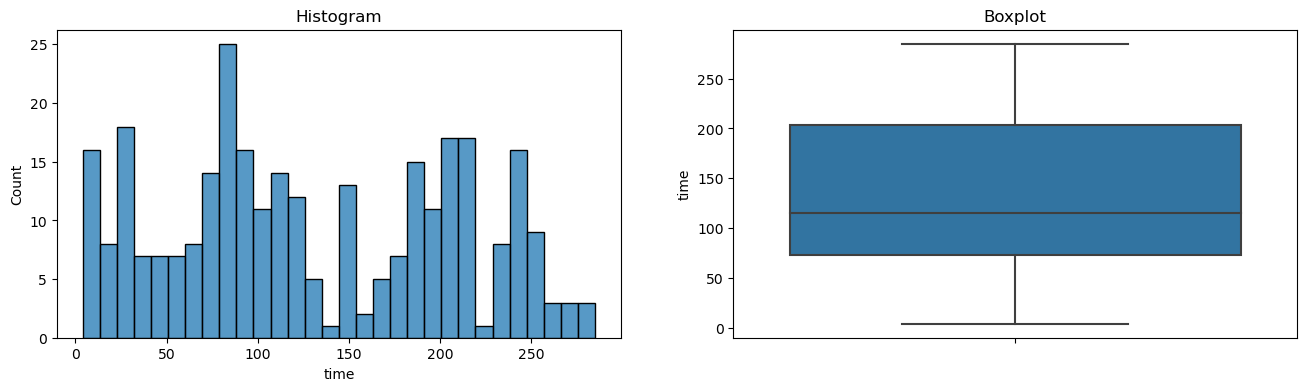


Skewness Value :  0.12780264559841184


In [305]:
# Call the function to generate diagnostic plots for 'time'
diagnostic_plots(df, 'time')
print('\nSkewness Value : ', df['time'].skew())

**NOTE :** Kolom yang memiliki outlier adalah  ejection_fraction dan platelets

## 6. DATA PREPROCESSING

### 6.1 Outlier Handling

The code focuses on handling outliers within a DataFrame using the Winsorizing method. Winsorizing involves capping extreme values in the dataset to reduce the impact of outliers on statistical analysis and modeling.

**Code Explanation**:
1. Import and Initialize Winsorizer:
   - The code first imports the necessary module and initializes a `Winsorizer` object. Winsorization is chosen as the capping method, and both tails (left and right) are capped.
   - The 'fold' parameter is set to 1.5, which determines the multiplier for the IQR (Interquartile Range) rule boundaries.

2. Define Variables to Be Winsorized:
   - The 'variables' parameter specifies the list of variables (columns) in the DataFrame 'df' that need outlier handling. In this case, 'distance,' 'temperature,' 'visibility,' and 'dewPoint' are selected.

3. Fit the Winsorizer:
   - The Winsorizer is fitted to the DataFrame 'df' using the `fit` method. This step calculates the IQR and boundaries for each specified variable.

4. Transform Data:
   - The Winsorizer transforms the DataFrame 'df' using the `transform` method. This step replaces extreme values that fall outside the IQR boundaries with the nearest non-outlier value within the boundaries. 

5. Display Data Summary:
   - The code prints summary statistics for the DataFrame 'df' both before and after the outlier handling process. This allows for a comparison of the data distribution and the effect of outlier treatment.

6. Generate Diagnostic Plots:
   - The `diagnostic_plots` function is called to create diagnostic plots for the 'temperature' variable in the transformed DataFrame 'df_ao.' This step helps assess the distribution and presence of outliers in the variable.

7. Calculate Skewness:
   - The skewness value of the 'temperature' variable in the transformed DataFrame 'df_ao' is calculated and printed. Skewness indicates the degree of asymmetry in the variable's distribution.


In [306]:
# Initialize Winsorizer 
handling_outlier = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['ejection_fraction', 'platelets'])

In [307]:
# perform outlier handling
handling_outlier.fit(df)
df_ao = handling_outlier.transform(df)

In [308]:
# Print data summaries, generate diagnostic plots, and calculate skewness
print('Dataframe - Before Capping')
print(df.describe())
print('')
print('Dataframe - After Capping')
print(df_ao.describe())

Dataframe - Before Capping
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.836120    0.431438                324.290970    0.418060   
std     11.894809    0.496107                264.941729    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               1211.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  255183.781773   
std            11.834841             0.478136   65566.768001   
min            14.000000             0.000000   87000.000000   
25%          

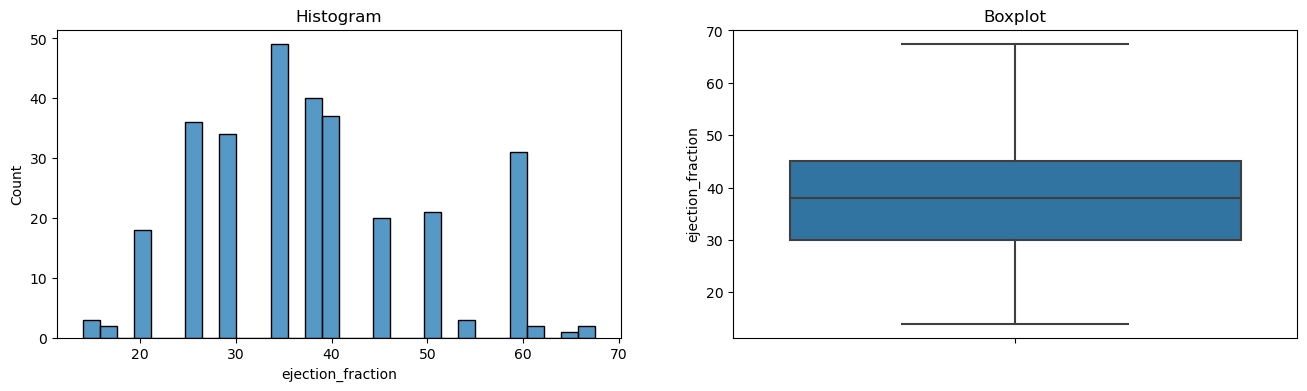


Skewness Value :  0.47292720904027147


In [309]:
diagnostic_plots(df_ao, 'ejection_fraction')
print('\nSkewness Value : ', df_ao['ejection_fraction'].skew())

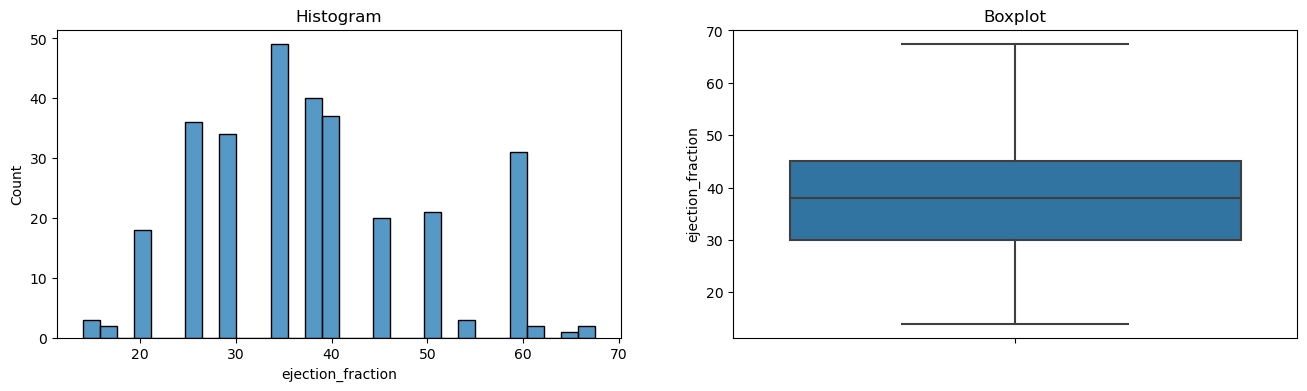


Skewness Value :  0.47292720904027147


In [310]:
diagnostic_plots(df_ao, 'ejection_fraction')
print('\nSkewness Value : ', df_ao['ejection_fraction'].skew())

**KESIMPULAN** : Data yang dihasilkan tidak lagi memiliki outlier dengan menggunakan winsorizer

### 6.2 Normalization

In [311]:
df_ao.sample()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
31,85,0,23,0,45.0,0,360000.0,1.1,132,1,0,28,1


1. **Define Feature Matrix (X) and Target Variable (y):**
   - `X`: The feature matrix, excluding the 'price' column.
   - `y`: The target variable, which is the 'price' column.

In [312]:
# define the feature matrix X and the target variable y
X = df_ao.drop(columns='DEATH_EVENT')
y = df_ao['DEATH_EVENT']

In [313]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

2. **Initialize Robust Scaler for Features and Target:**
   - Two separate scalers (`scaler_X` and `scaler_y`) are initialized for features and the target variable, respectively.


In [314]:
# Initialize the Robust Scaler
scaler_X = RobustScaler()

3. **Fit and Transform the Data:**
   - The feature matrix (`X`) is fit and transformed using `scaler_X`.
   - The target variable (`y`) is fit and transformed using `scaler_y`.

In [315]:
# Scale the Data
scaler_X.fit(X)

RobustScaler()

In [316]:
X_scaled = scaler_X.transform(X)

4. **Convert to DataFrame:**
   - The scaled feature matrix (`X_scaled`) is converted back to a DataFrame with the original column names.
   - The scaled target variable (`y_scaled`) is flattened to ensure compatibility with some machine learning models.


In [317]:
# Convert to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [318]:
print("X shape =",X_scaled.shape)
print("y shape =",y.shape)

X shape = (299, 12)
y shape = (299,)


In [319]:
# Display the Normalized Data
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75,0,582,0,20.0,1,265000.00,1.9,130,1,0,4
1,55,0,250,0,38.0,0,263358.03,1.1,136,1,0,6
2,65,0,146,0,20.0,0,162000.00,1.3,129,1,1,7
3,50,1,111,0,20.0,0,210000.00,1.9,137,1,0,7
4,65,1,160,1,20.0,0,327000.00,1.1,137,0,0,8


### 6.4 Split Data

The code is responsible for splitting the dataset into training and testing sets, a fundamental step in machine learning model development. This separation allows for model training and evaluation on distinct sets of data.

**Code Explanation**:

1. **Split the Data**:
   - The `train_test_split` function from the `sklearn.model_selection` module is used to perform the data split. The function takes the following parameters:
     - `X`: The feature matrix.
     - `y`: The target variable.
     - `test_size`: The proportion of the data to allocate to the testing set. In this case, it's set to 30% (0.3).
     - `random_state`: A seed for the random number generator to ensure reproducibility.

2. **Output**:
   - The result of the data split is four data sets:
     - `X_train`: The feature matrix for the training set.
     - `X_test`: The feature matrix for the testing set.
     - `y_train`: The target variable for the training set.
     - `y_test`: The target variable for the testing set.

In [320]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [321]:
# Split the data into training and testing sets for scaled data
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## 7. PENDEFINISIAN MODEL

Kode ini bertanggung jawab untuk mendefinisikan dan melatih model machine learning Random Forest

**Penjelasan Kode**:

 **Model Random Forest**:
   - Model Random Forest dibuat menggunakan kelas `RandomForestClassifier` dari modul `sklearn.ensemble`.
   - Parameter yang digunakan:
     - `random_state=42`: Seed untuk generator angka acak untuk memastikan reproduktibilitas.
   - Model Gradient Boostnig dibuat menggunakan kelas `GradientBoostingClassifier` dari modul `sklearn.ensemble`.
   - Parameter yang digunakan:
     - `random_state=42`: Seed untuk generator angka acak untuk memastikan reproduktibilitas.
     - `n_estimators` : Menentukan jumlah pohon kecil (weak learners atau estimator) yang akan digunakan dalam model
     - `learning_rate` : Mengontrol kontribusi setiap pohon kecil terhadap model akhir.
     - `max_depth` : Menentukan kedalaman maksimum setiap pohon kecil. 
     

In [322]:
# Inisialisasi model RandomForest
random_forest = RandomForestClassifier(random_state=42)

In [323]:
# Inisialisasi model lemah (contohnya, Decision Tree)
weak_model = DecisionTreeClassifier(max_depth=1)

# Inisialisasi model AdaBoost dengan model lemah
adaboost_model = AdaBoostClassifier(base_estimator=weak_model, n_estimators=100, random_state=42)

## 8. PELATIHAN MODEL

Kode ini bertanggung jawab untuk melatih model machine learning yang telah didefinisikan sebelumnya, yaitu model  Random Forest (`random_forest`) 

**Penjelasan Kode**:

**Melatih Model Logistic Regression**:
   - Model Logistic Regression (`random_forest`) dan (`Gradient Boosting`) dilatih menggunakan metode `fit` pada data latih (`X_train` dan `y_train`).
   - Data latih `X_train` adalah matriks fitur, dan `y_train` adalah variabel target.




In [324]:
random_forest.fit(Xs_train, ys_train)

RandomForestClassifier(random_state=42)

**Implementasi Boosting dengan Scikit-Learn**

In [325]:
# Latih model
adaboost_model.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

## 9. EVALUASI MODEL

Kode ini melakukan evaluasi terhadap model machine learning yang telah dilatih sebelumnya, yaitu model Random Forest.

1. Prediksi dan Akurasi:
   - Model Random Forest melakukan prediksi pada data latih (`y_train_pred_logic`) dan data uji (`y_test_pred_logic`).
   - Menghitung akurasi untuk data latih dan data uji menggunakan fungsi `accuracy_score`.
   - Menampilkan laporan klasifikasi (`classification_report`) untuk evaluasi lebih lanjut.

2. Matriks Konfusi:
   - Membuat matriks konfusi untuk hasil prediksi pada data uji menggunakan `confusion_matrix`.
   - Menampilkan matriks konfusi dalam bentuk heatmap.
   
3. Visualisasi Koefisien:
   - Membuat DataFrame (`coef_df`) untuk menyimpan nilai koefisien dan nama fitur.
   - Mengurutkan DataFrame berdasarkan nilai koefisien.
   - Menampilkan plot bar untuk visualisasi nilai koefisien yang telah diurutkan.

In [326]:
# Melakukan prediksi pada variabel training dan testing
y_train_pred_logic = random_forest.predict(Xs_train)
y_test_pred_logic = random_forest.predict(Xs_test)

# Melihat hasil akurasi prediksi
print("Akurasi training: ", accuracy_score(ys_train, y_train_pred_logic))
print("Akurasi Uji: ", accuracy_score(ys_test, y_test_pred_logic))
print(classification_report(ys_test, y_test_pred_logic))

Akurasi training:  1.0
Akurasi Uji:  0.7666666666666667
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        53
           1       0.86      0.51      0.64        37

    accuracy                           0.77        90
   macro avg       0.80      0.73      0.74        90
weighted avg       0.79      0.77      0.75        90



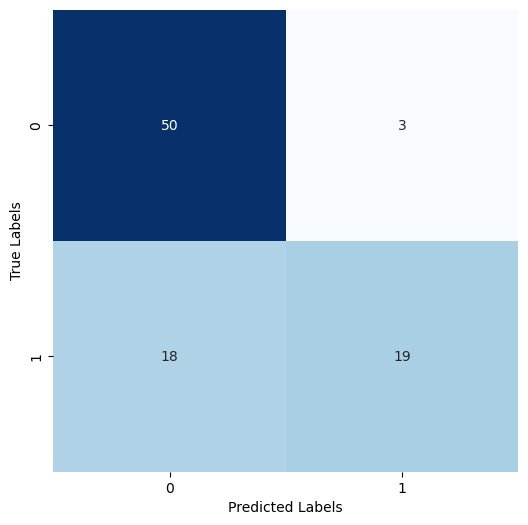

In [327]:
# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm_logic = confusion_matrix(ys_test, y_test_pred_logic)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_logic, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

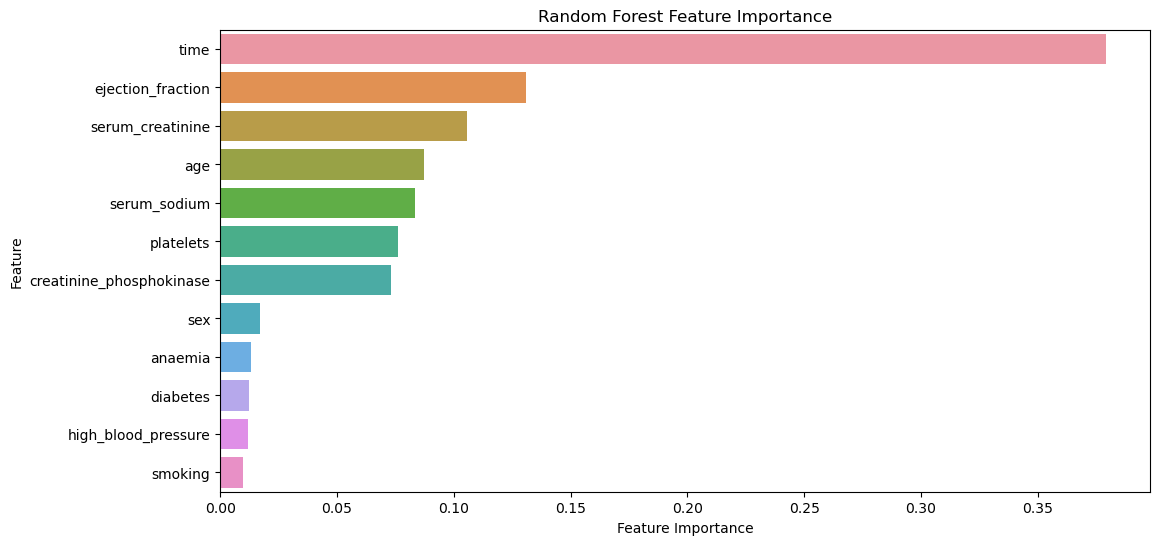

In [328]:
# Membuat DataFrame untuk menyimpan pentingnya fitur
coef_df = pd.DataFrame({'Feature': X.columns, 'Importance': random_forest.feature_importances_})

# Mengurutkan DataFrame berdasarkan pentingnya fitur secara menurun
coef_df_sorted = coef_df.sort_values(by='Importance', ascending=False)

# Plot pentingnya fitur yang telah diurutkan
plt.figure(figsize=(12, 6))
sns.barplot(x=coef_df_sorted['Importance'], y=coef_df_sorted['Feature'])
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [329]:
# Melakukan prediksi pada variabel training dan testing
y_train_pred_boost = adaboost_model.predict(X_train)
y_test_pred_boost = adaboost_model.predict(X_test)

# Melihat hasil akurasi prediksi
print("Akurasi training: ", accuracy_score(y_train, y_train_pred_boost))
print("Akurasi Uji: ", accuracy_score(y_test, y_test_pred_boost))
print(classification_report(y_test, y_test_pred_boost))

Akurasi training:  0.9952153110047847
Akurasi Uji:  0.7666666666666667
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        53
           1       0.81      0.57      0.67        37

    accuracy                           0.77        90
   macro avg       0.78      0.74      0.74        90
weighted avg       0.77      0.77      0.76        90



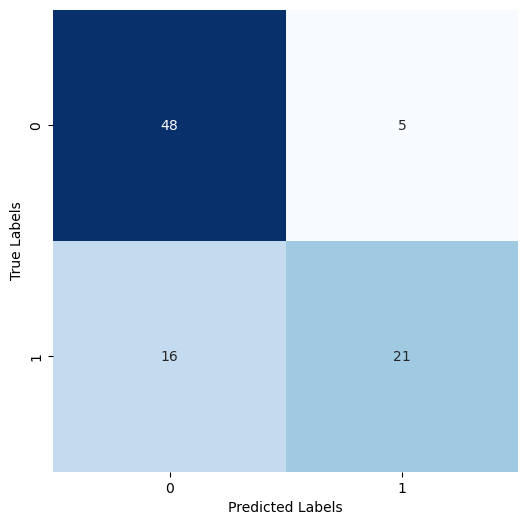

In [330]:
# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm_logic = confusion_matrix(y_test, y_test_pred_boost)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_logic, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

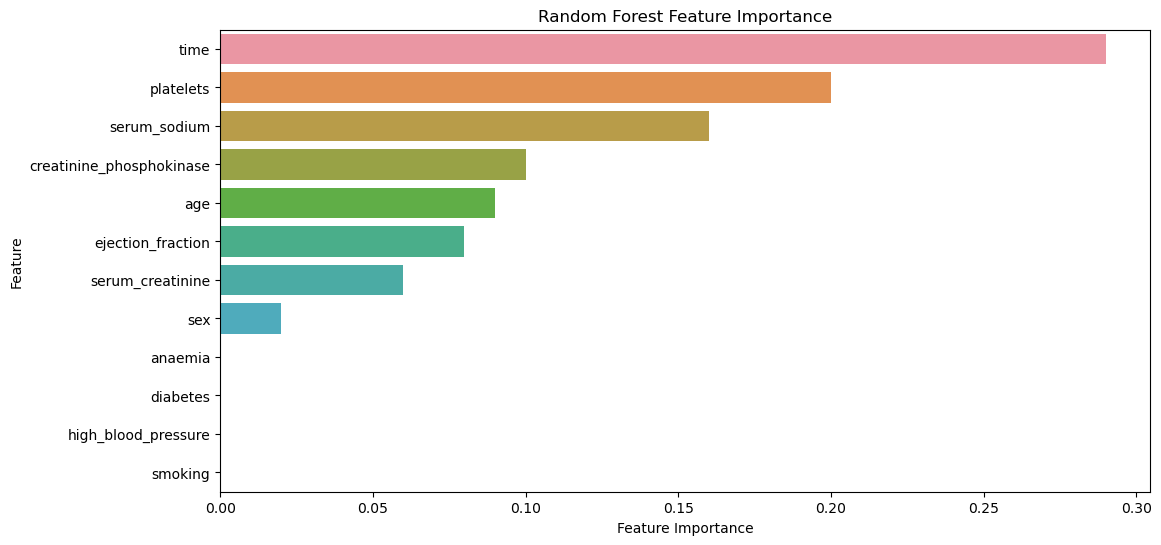

In [331]:
# Membuat DataFrame untuk menyimpan pentingnya fitur
coef_df = pd.DataFrame({'Feature': X.columns, 'Importance': adaboost_model.feature_importances_})

# Mengurutkan DataFrame berdasarkan pentingnya fitur secara menurun
coef_df_sorted = coef_df.sort_values(by='Importance', ascending=False)

# Plot pentingnya fitur yang telah diurutkan
plt.figure(figsize=(12, 6))
sns.barplot(x=coef_df_sorted['Importance'], y=coef_df_sorted['Feature'])
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

**NOTE** <br>
Dari plot diatas terdapat beberapa fitur yang sangat mempengaruhi model random forest. Maka akan di ambil 7 Fitur yang saling mempengaruhi ke 2 model tersebut, diantaranya :
 - time
 - ejection_fraction
 - serum_creatinine
 - age
 - serum_sodium
 - creatinine_phosphokinase
 - platelets


## 9.1 Make a New Fiture

Dari kesimpulan pada grafik sebelumnya maka akan dibuat sebuah fitur baru yang terdiri dari 7 kolom yang diambil dari df_ao dan akan dinormalisasi kembali menggunakan Robust Scalar.

In [332]:
# define the feature and target
fiture = df_ao[['time', 'ejection_fraction', 'serum_creatinine', 'age', 'serum_sodium', 'creatinine_phosphokinase', 'platelets']]
target = df_ao['DEATH_EVENT']
fiture.head()

,time,ejection_fraction,serum_creatinine,age,serum_sodium,creatinine_phosphokinase,platelets
0,4,20.0,1.9,75,130,582,265000.00
1,6,38.0,1.1,55,136,250,263358.03
2,7,20.0,1.3,65,129,146,162000.00
3,7,20.0,1.9,50,137,111,210000.00
4,8,20.0,1.1,65,137,160,327000.00


In [333]:
# Inisialisasi RobustScaler
scaler = RobustScaler()

# Transformasi data menggunakan RobustScaler
scaler.fit(fiture)
fiture_scaled = scaler.transform(fiture)

# Konversi hasil transformasi ke DataFrame
fiture_scaled_df = pd.DataFrame(fiture_scaled, columns=fiture.columns)

# Tampilkan hasil setelah scaling
fiture_scaled_df.sample()


,time,ejection_fraction,serum_creatinine,age,serum_sodium,creatinine_phosphokinase,platelets
71,-0.338462,-0.2,-0.666667,-0.105263,0.333333,0.713212,-2.014388


In [334]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fiture_scaled_df, target, test_size=0.3, random_state=42)

## 9.2 Make a New Model Machine Learning Random Forest


1. **Model Random Forest Biasa:**
   - Membuat model Random Forest (`random_forest_biasa`)
   - Melatih model menggunakan data latih (`X_train`, `y_train`).
   - Melakukan prediksi pada data latih dan data uji.
   - Menghitung dan menampilkan akurasi serta laporan klasifikasi.
   
2. **Model Random Forest dengan tambahan parameter:**
   - Membuat model Random Forest (`random_forest_2`)  dengan menyertakan parameter min_samples_leaf, min_samples_split, dan n_estimators
   - Melatih model menggunakan data latih (`X_train`, `y_train`).
   - Melakukan prediksi pada data latih dan data uji.
   - Menghitung dan menampilkan akurasi serta laporan klasifikasi.

3. **Matriks Konfusi:**
   - Membuat matriks konfusi untuk hasil prediksi pada data uji.
   - Menampilkan matriks konfusi dalam bentuk heatmap.

Akurasi training (balanced):  1.0
Akurasi Uji (balanced):  0.7666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        37

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



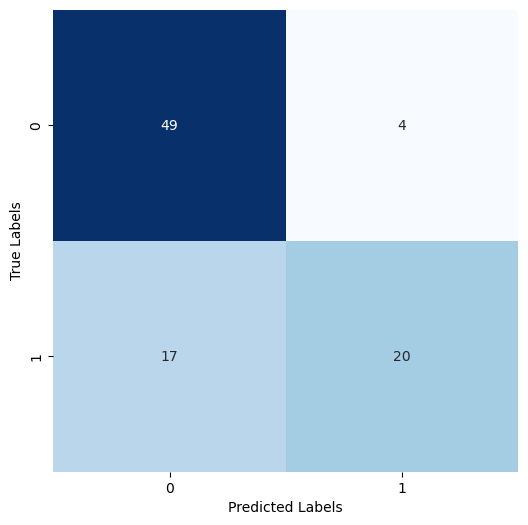

In [335]:
# Inisialisasi model RandomForestClassifier biasa
random_forest_biasa = RandomForestClassifier(random_state=43)

# Latih model menggunakan set pelatihan
random_forest_biasa.fit(X_train, y_train)

# Prediksi menggunakan set uji
y_train_pred_biasa = random_forest_biasa.predict(X_train)
y_test_pred_biasa = random_forest_biasa.predict(X_test)

# Melihat hasil akurasi prediksi
print("Akurasi training (balanced): ", accuracy_score(y_train, y_train_pred_biasa))
print("Akurasi Uji (balanced): ", accuracy_score(y_test, y_test_pred_biasa))
print(classification_report(y_test, y_test))

# Buat matriks konfusi dari hasil prediksi testing model machine learning (balanced)
cm_biasa = confusion_matrix(y_test, y_test_pred_biasa)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_biasa, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Akurasi training (2):  0.9234449760765551
Akurasi Uji (2):  0.8
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        53
           1       0.88      0.59      0.71        37

    accuracy                           0.80        90
   macro avg       0.82      0.77      0.78        90
weighted avg       0.81      0.80      0.79        90



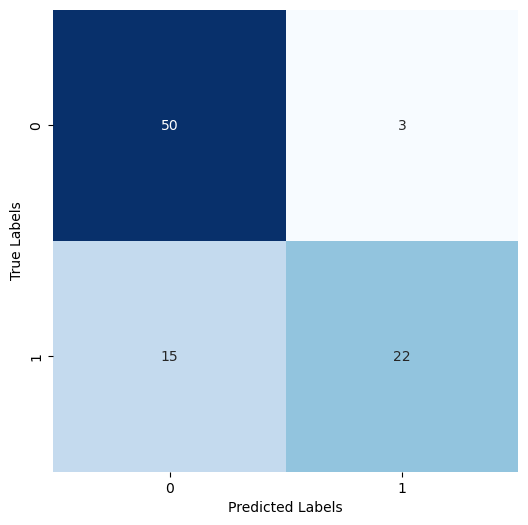

In [336]:
# Inisialisasi model RandomForestClassifier dengan tambahan parameter
random_forest_2 = RandomForestClassifier(min_samples_leaf = 2,min_samples_split = 10,n_estimators=11, random_state=45)

# Latih model menggunakan set pelatihan
random_forest_2.fit(X_train, y_train)

# Prediksi menggunakan set uji
y_train_pred_2 = random_forest_2.predict(X_train)
y_test_pred_2 = random_forest_2.predict(X_test)

# Melihat hasil akurasi prediksi
print("Akurasi training (2): ", accuracy_score(y_train, y_train_pred_2))
print("Akurasi Uji (2): ", accuracy_score(y_test, y_test_pred_2))
print(classification_report(y_test, y_test_pred_2))

# Buat matriks konfusi dari hasil prediksi testing model RandomForestClassifier (2)
cm_2 = confusion_matrix(y_test, y_test_pred_2)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**Analisis:**

**Menggunakan parameter random_state, min_samples_leaf, min_samples_split, dan n_estimators :**
- Model ini menunjukkan keseimbangan yang lebih baik antara akurasi training dan akurasi uji. Walaupun akurasi training lebih rendah dari model tanpa tambahan parameter, akurasi uji yang lebih tinggi menunjukkan kemampuan model untuk lebih baik dalam generalisasi pada data baru.

**Menggunakan paramter random_state :**
- Terdapat tanda-tanda overfitting karena akurasi training mencapai 100%, namun akurasi uji lebih rendah (76.67%). Model ini mungkin terlalu kompleks dan terlalu spesifik terhadap data pelatihan.

## 10. MODEL INFERENCE

1. DataFrame df_new_data dibuat dengan 50 baris data acak untuk memperoleh hasil prediksi.
2. Fitur baru diubah skala menggunakan "scaler" yang sebelumnya telah diinisialisasi.
3. Prediksi dilakukan pada fitur baru menggunakan model random forest dengan penanganan ketidakseimbangan dan yang tidak.

In [337]:
fiture.head(10)

,time,ejection_fraction,serum_creatinine,age,serum_sodium,creatinine_phosphokinase,platelets
0,4,20.0,1.9,75,130,582,265000.00
1,6,38.0,1.1,55,136,250,263358.03
2,7,20.0,1.3,65,129,146,162000.00
3,7,20.0,1.9,50,137,111,210000.00
4,8,20.0,1.1,65,137,160,327000.00
5,8,40.0,2.1,90,132,47,204000.00
6,10,15.0,1.2,75,137,246,127000.00
7,10,60.0,1.1,60,131,315,262000.00
8,10,65.0,1.5,65,138,157,263358.03
9,10,35.0,1.1,80,133,123,388000.00


In [338]:
# Membuat DataFrame dengan 10 baris data
data = {
    'time': np.random.randint(0, 285, 50),
    'ejection_fraction': np.random.randint(10, 70, 50),
    'serum_creatinine': np.random.randint(0, 3, 50),
    'age': np.random.uniform(40, 100, 50).round(2),
    'serum_sodium': np.random.uniform(120, 150, 50).round(2),
    'creatinine_phosphokinase': np.random.randint(20, 1300, 50),
    'platelets': np.random.randint(110000, 400000, 50)
}

df_new_data = pd.DataFrame(data)
df_new_data.head()

,time,ejection_fraction,serum_creatinine,age,serum_sodium,creatinine_phosphokinase,platelets
0,7,50,2,87.89,121.16,607,353926
1,241,55,1,48.82,130.73,259,110619
2,176,15,1,56.54,134.37,1056,201907
3,189,42,0,58.08,147.98,1155,292521
4,205,40,1,44.24,145.62,1027,187424


In [339]:
# Inisialisasi RobustScaler
scaler = RobustScaler()

# Pilih kolom-kolom yang ingin diubah skala (dalam hal ini, seluruh kolom)
columns_to_scale = df_new_data.columns

# Transformasi data menggunakan RobustScaler
df_new_data_scaled = pd.DataFrame(scaler.fit_transform(df_new_data), columns=columns_to_scale)

# Tampilkan hasil setelah scaling
df_new_data_scaled.sample()

x_modelinference = df_new_data_scaled


In [340]:
predict_new_fiture = random_forest_2.predict(x_modelinference)
predict_new_fiture

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0], dtype=int64)

In [341]:
predict_new_fiture = random_forest_biasa.predict(x_modelinference)
predict_new_fiture

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0], dtype=int64)

## 11. PENGAMBILAN KESIMPULAN

# Kesimpulan

Dalam menjalankan proses analisis prediksi keselamatan pasien dari penyakit jantung, beberapa langkah penting telah diambil:

1. **Distribusi Data:**
      - Dilakukan analisis distribusi data untuk setiap kolom numerik, mengidentifikasi kolom dengan distribusi normal dan skewness.
      
2. **Explorasi Data:**
   - Data pasien memiliki berbagai kolom yang mencakup informasi tentang umur, kondisi haemoglobin, riwayat diabetes, dan parameter cuaca lainnya.

   - **Data Visualization:**
      - Dibuat diagram distribusi untuk kolom-kolom numerik dan dilakukan visualisasi skor skewness.

3. **Outlier Handling:**
   - Untuk menghandle outlier menggunakan winsorizer dengan foldnya 1.5.
   - Yang bertujuan untuk menjaga tetap adanya outlier dengan batas tertentu.

5. **Data Normalisasi:**
   - Sebelum data akan dinormalisi data akan dipisah menjadi fiture dan target.
   - Fiture dan target akan di normalisasi menggunakan `Robust Scalar`.

6. **Model Machine Learning:**
   - Sebelumnya data akan dipisah menggunakan `train_test_split`.
   - Dilakukan pemilihan dan pelatihan model machine learning, seperti menggunakan Random Forest

7. **Analisis Model:**
   - Evaluasi hasil model menggunakan metrik-metrik seperti akurasi, precision, recall, dan f1-score.

   - **Penanganan Ketidakseimbangan Kelas:**
      - Jika terdapat ketidakseimbangan kelas, dilakukan strategi seperti menyertakan parameter random min_samples_leaf, min_samples_split, random_state, dan n_estimators.

9. **Model Inference:**
   - Dibuat 50 baris data baru untuk fitur-fitur tertentu dalam bentuk DataFrame.
   - Data baru tersebut akan dinormalisasi menggunakan `scaler` yang menyimpan model `Robust Scalar`.
   - Memprediksi data baru menggunakan model `Random Forest` yang menggunakan tambahan parameter ataupun tidak.

Proses analisis data pasien ini bertujuan untuk memahami, membersihkan, dan mempersiapkan data untuk pemodelan machine learning serta mengambil langkah-langkah untuk meningkatkan kinerja model terdahap target yang tidak balance.


Dari hasil prediksi diperoleh model `Random Forest` lebih baik di bandingkan dengan model `AdaBoost` dengan perbandngan akurasinya akhir `80%` untuk `Random Forest` dan `76%` untuk `AdaBoost`

### 11.1 Export for Deploy

Dari kesimpulan di atas, akan mengekspor beberapa model yang akan di gunakan untuk deploy menggunakan flask, yaitu:
- `fiture_scalar` = untuk menormalisasi data menggunakan `Robust Scalar`.
- `model_svm_balanced` = untuk memprediksi apakah terjadinya hujan untuk esok menggunakan algoritma `SVM` dengan class_weightnya `balanced`.

In [342]:
#save new machine learning model
with open('random_forest.pkl', 'wb') as model_file:
    pickle.dump(random_forest_2, model_file)

#save Robust Scalar model
with open('scaler.pkl', 'wb') as model_file:
    pickle.dump(scaler, model_file)